# Red Wine Quality Prediction 

# About Datasets

This dataset is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables (based on physicochemical tests):

1) fixed acidity
2) volatile acidity
3) citric acid
4) residual sugar
5) chlorides
6) free sulfur dioxide
7) total sulfur dioxide
8) density
9) pH
10) sulphates
11) alcohol Output variable (based on sensory data)
12) quality (score between 0 and 10) : Output variable (based on sensory data)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

Our goal is to make a machine learning model that can predict the quality of wine based on the input variable (features) given above.

# Importing Library

In [26]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This dataset contain only numerical value not have any categorical value present in this datasets. Here is Quality is target data we are using "Clasification models. Lets predicted.

In [28]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [29]:
df.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


# Exploratory Data Analysis(EDA)

In [30]:
# Checking the dimention of the datasets
df.shape

(1599, 12)

The datasets contains 1599 rows and 12 coloumns. Out of which 1 is target variable and remaining 11 are independent variable.

In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
# Checking the columns of datasets
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [33]:
# Checking types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are two different types of data (Int, float) persent in the dataset.

In [34]:
# Checking the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see there are no null values present in this dataset.

<Axes: >

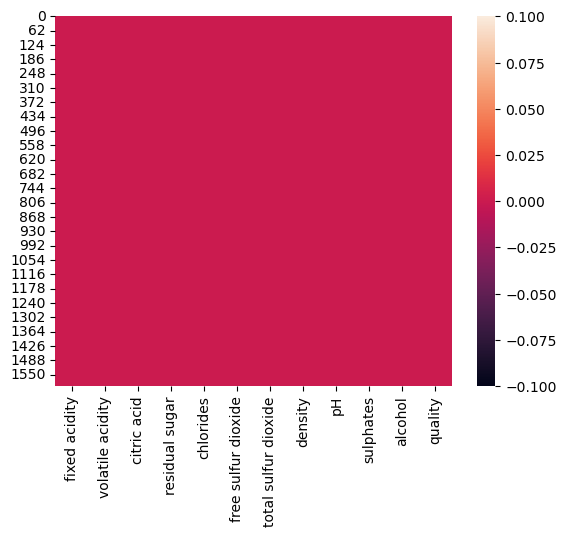

In [37]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

And we can clearly visualize that there is no missing values in this present dataset.

In [38]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives brief about the dataset which is include indexing type, columns type and no null value persent in this dataset.

In [39]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [40]:
df['quality'].nunique()

6

In [41]:
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [42]:
df['alcohol'].nunique()

65

In [43]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [44]:
df['pH'].nunique()

89

In [45]:
# Checking the value counts of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above data description we can conclude that value of density is almost similar throughout the dataset, because mean, min, 25%, 50%, 75% are all ~0.99.

So I am choosing to drop density feature as it will not have much significance in predicting quality of wine.

In [47]:
df.drop(labels='density', axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [49]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


In [50]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166


In [51]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
quality,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,3.267222,0.767778,12.094444


# Data Analysis

### Countplot:

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


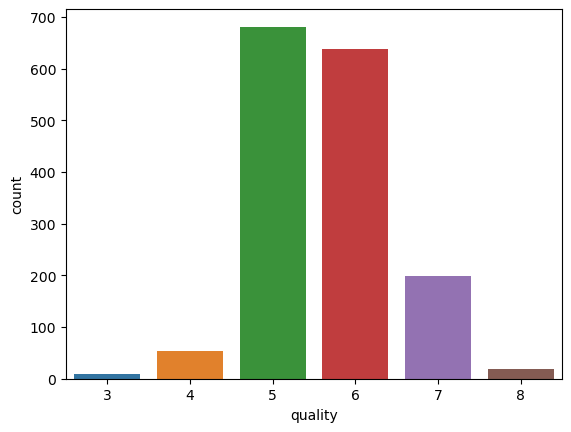

In [56]:
ax = sns.countplot(x='quality', data=df)
print(df['quality'].value_counts())

pH
3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: count, Length: 89, dtype: int64


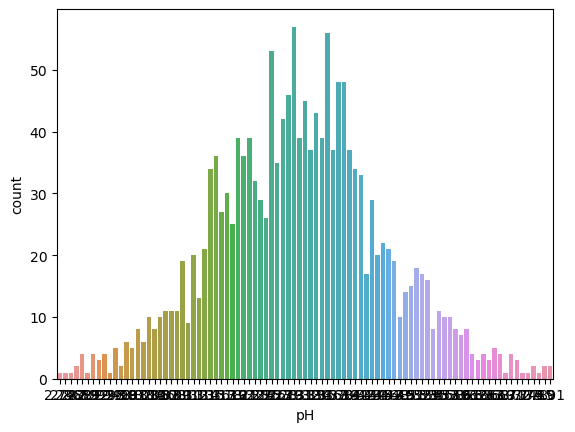

In [57]:
ax = sns.countplot(x='pH', data=df)
print(df['pH'].value_counts())

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64


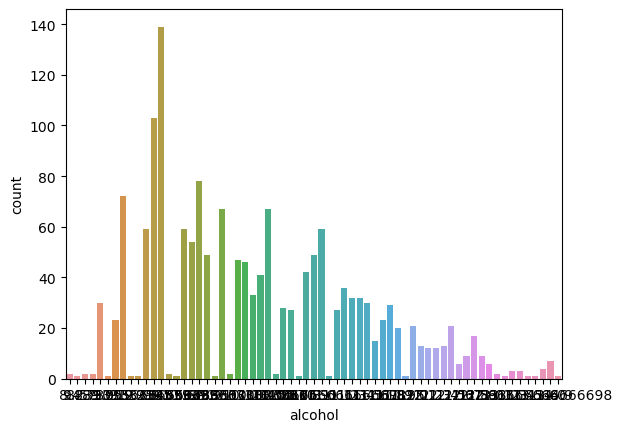

In [59]:
ax = sns.countplot(x='alcohol', data=df)
print(df['alcohol'].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


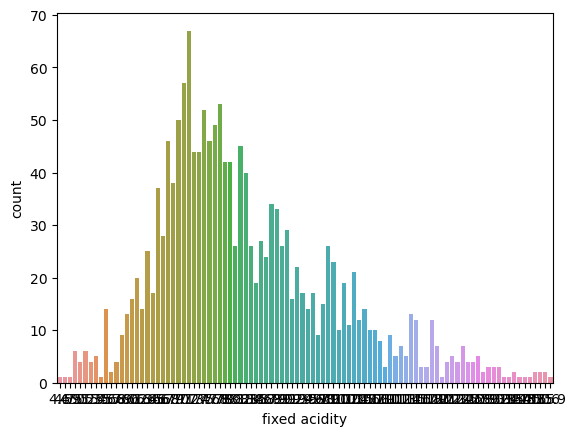

In [60]:
ax = sns.countplot(x='fixed acidity', data=df)
print(df['fixed acidity'].value_counts())

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


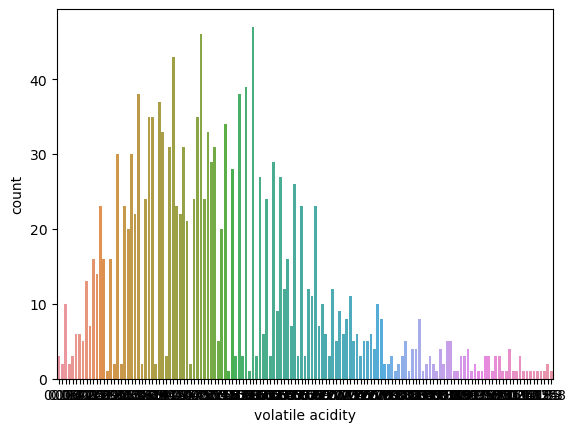

In [61]:
ax = sns.countplot(x='volatile acidity', data=df)
print(df['volatile acidity'].value_counts())

citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


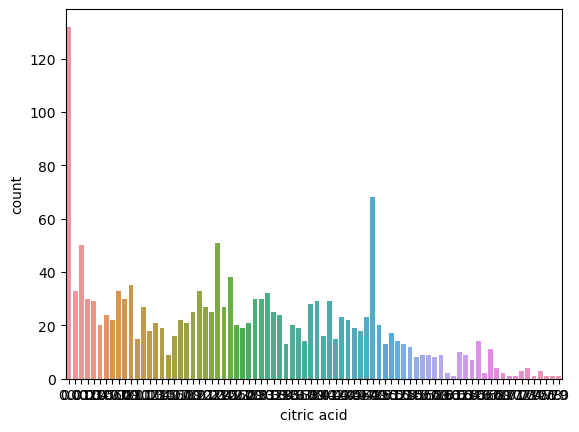

In [62]:
ax = sns.countplot(x='citric acid', data=df)
print(df['citric acid'].value_counts())

# Checking for outliers in our dataset

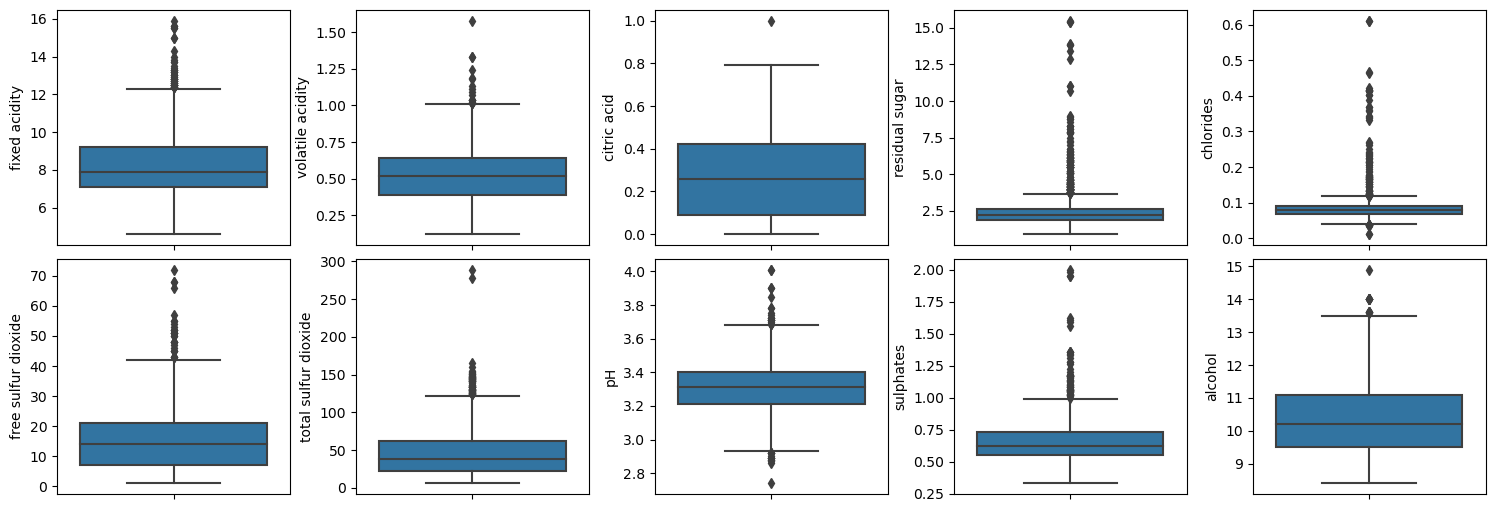

In [64]:
# Ploting boxplot to see if there are any outliers in our data (consider in given data between 25th and 75th percentile as non outliers)

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'quality':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

From the above box plots we can clearly see that there are outliers in all features.

**BUT**

Here I am choosing not remove/modify outliers as we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition (hence outlier) from other average quality wines, so we can not remove or modify outlier values in out dataset.

### Plotting bar plots to see relation between each independent feature with dependent feature 'Quality'

<function matplotlib.pyplot.show(close=None, block=None)>

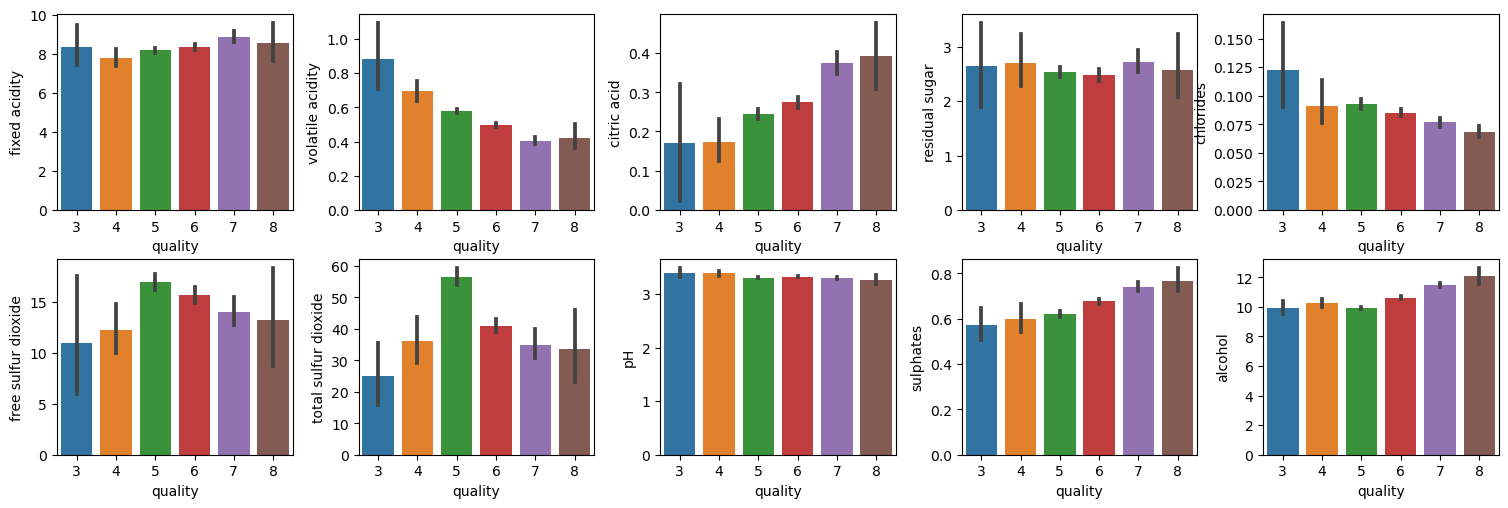

In [65]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

**From the above visualisation we derieve that:**

1) Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.
2) Quality increases with
* decrease in volatile acidity.
* increase in citric acid.
* decrease in chlorides.
* decrease in pH.
* increase in sulphates.
* increase in alcohol.
3) Free sulfur dioxide alone will not be able to predict the quality.
4) Total sulfur dioxide alone will not be able to predict the quality.

### Plotting correlation heatmap to verify the above statements

In [67]:
from scipy.stats import pearsonr

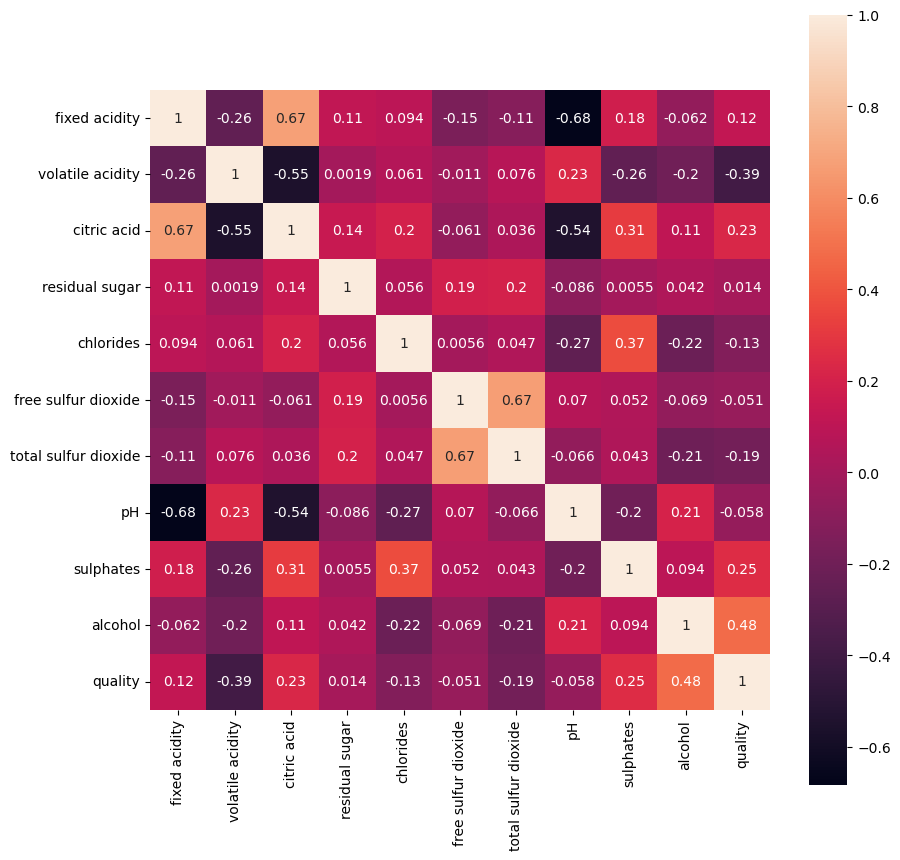

Correlation of different features of our datasets with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [68]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our datasets with quality:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['quality'])
  print('%s : %.4f' %(i,corr))

In [69]:
#for a better view this way can be used
print('Another (more clear) view of correlations among features:\n')
df.corr().style.background_gradient(cmap="coolwarm")

Another (more clear) view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166


**From the above plots and values we can conclude:**

1) volatile acidity, chlorides and ph are negatively correlated to quality -- hence our statement was right that quality increases with decrease in value of these features; and vice versa for other features.
2) free sulfur dioxide and total sulfur dioxide are highly correlated to each other with correlation of 0.67.
3) There are many features with correlation < 0.5 to quality, and may be removed from the dataset.


BUT for the same reason as mentioned above in outlier section, that -- we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition from other average quality wines, hence we need to take every feature in account while predicting quality of wine, so we can not remove or modify outlier values in out dataset.

# Preprocessing The Data

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# No missing values in this dataset, so we can skip handling missing values

# Create labels based on quality
df['good'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into features and target variable
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build and Train Models

### We will use three different classification algorithms: Decision Tree, Random Forest, and Logistic Regression.

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluate Models

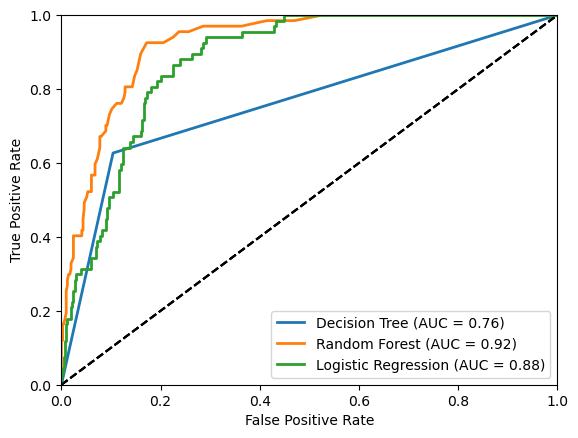

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.49      0.63      0.55        67

    accuracy                           0.86       480
   macro avg       0.72      0.76      0.73       480
weighted avg       0.87      0.86      0.87       480

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.63      0.48      0.54        67

    accuracy                           0.89       480
   macro avg       0.77      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       413
           1       0.57      0.31      0.40        67

    accuracy                           0.87       480
   macro av

In [76]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Decision Tree ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
plot_roc_curve(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Random Forest ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
plot_roc_curve(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
plot_roc_curve(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Show the plot
plt.legend()
plt.show()

# Print classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))